## Resolucion de Ecuaciones Diferenciales Ordinarias (EDO)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Para integrar EDOs vamos a usar la funcion <code>odeint</code> del paquete <code>integrate</code>, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(t, \mathbf{y}\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-danger" role="alert">
    <b>¡Importante!</b>: La función del sistema recibe como primer argumento el instante $t$ (un escalar) y como segundo argumento $\mathbf{y}$ (un array).
</div>

In [2]:
from scipy.integrate import solve_ivp

Vamos a integrar primero una EDO elemental, cuya solucion ya conocemos:

$$y' + y = 0$$
$$y' = -y$$

$$f(y, t) = \frac{dy}{dt} = -y$$

In [3]:
def f(t, y):
    f = np.array([-y])
    return f

Condiciones iniciales:

In [4]:
y0 = np.array([1]) # Hacemos un arreglo con un dato igual a 1
print('y0 : ', y0)

tini = 0  # Este es el intervalo de trabajo
tfin = 3

y0 :  [1]


Integramos y representamos la solucion:

In [5]:
sol = solve_ivp(f, (tini, tfin), y0)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10001999, 1.03186487, 1.90765136, 2.78720278,
       3.        ])
 t_events: None
        y: array([[1.        , 0.90481933, 0.35660435, 0.14860781, 0.06169755,
        0.04987137]])
 y_events: None


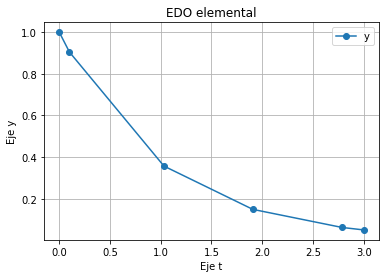

In [6]:
plt.plot(sol.t, sol.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc=0)

la pregunta que surge es ¿como se han seleccionado los puntos en los que se calcula la solucion?
El solver los ha calculado por nosotros.
Si queremos tener control sobre estos puntos, podemos pasar de manera explicita el vector de tiempos:

In [7]:
time = np.linspace(tini, tfin, 30)  # Definimos la variable tiempo

In [8]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval = time)

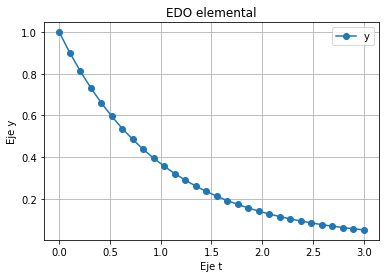

In [9]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y'], loc = 0)

Probemos a pintar las dos soluciones anteriores, una encima de la otra:

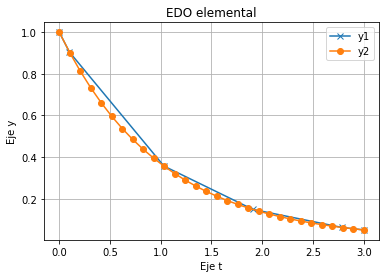

In [10]:
plt.plot(sol.t, sol.y[0, :], 'x-')
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1', 'y2'], loc = 0)

Podemos observar que a pesar de que en la primera se han usado muchos menos puntos, aquellos en los que se ha calculado la solucion coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solucion, pero solo guarda los que nosotros le indicamos. Esto lo podemos ver del siguiente modo:

In [11]:
print(f"Evaluaciones de funciones en sol 1: {sol.nfev}")
print(f"Evaluaciones de funcioens en sol 2: {sol_2.nfev}")

Evaluaciones de funciones en sol 1: 32
Evaluaciones de funcioens en sol 2: 32


Para ello podemos usar la salida densa <code>dense_output = True</code> para obtener la solucion en un punto cualquiera:

In [12]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output = True)
print(f"Evaluaciones de funciones en sol 2: {sol_3.nfev}")

Evaluaciones de funciones en sol 2: 32


In [13]:
sol_3.sol(1.161)

array([0.31336161])

In [14]:
t = np.linspace(tini, tfin, 60)
y = sol_3.sol(t)

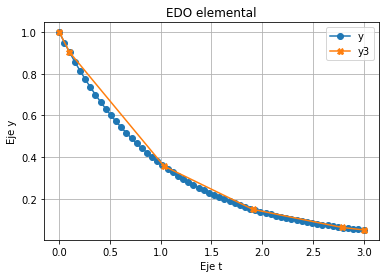

In [15]:
plt.plot(t, y[0, :],'o-')
plt.plot(sol_3.t, sol_3.y[0, :], 'X-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y', 'y3'], loc = 0)

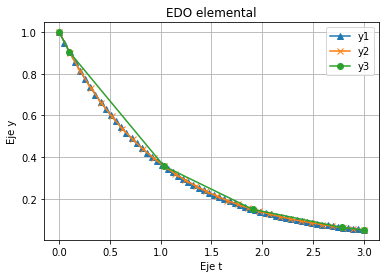

In [16]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')
plt.grid()
plt.xlabel('Eje t')
plt.ylabel('Eje y')
plt.title('EDO elemental')
plt.legend(['y1', 'y2', 'y3'], loc = 0)

### EDOs de orden superior

Tendremos que acordarnos ahora de como reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemploo academico:

$$y + y'' = 0$$
$$y = -y''$$
definimos $\mathbf{y} \leftarrow \pmatrix{y \\ y'}$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

In [17]:
def f(t, y):
    f = np.array([y[1], -y[0]])
    return f

In [18]:
tini = 0
tfin = 10

t = np.linspace(tini, tfin)  # por default son 50 pasos
y0 = np.array([1.0, 0.0])  # un arreglo de dos elementos

In [19]:
print(y0)

[1. 0.]


In [20]:
sol = solve_ivp(f, (tini, tfin), y0, t_eval = t)

Text(0.5, 1.0, 'EDO de segundo orden')

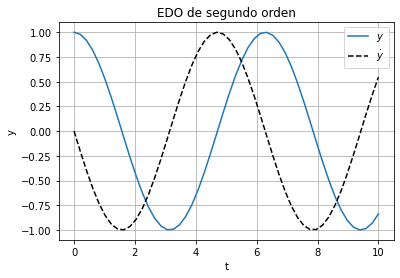

In [21]:
plt.plot(t, sol.y[0, :], label='$y$')
plt.plot(t, sol.y[1, :], '--k', label='$\dot{y}$')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('EDO de segundo orden')

### Otro ejemplo

Decaimiento exponencial basica que muestra los puntos de tiempo elegidos automaticamente.

In [22]:
def exponential_decay(t, y):
    return -0.5 * y

In [23]:
intervalo = [0, 30]
sol = solve_ivp(exponential_decay, intervalo, [2])
print(sol.y[0])

[2.00000000e+00 1.88835583e+00 1.06324380e+00 4.33165311e-01
 1.80149050e-01 7.48084146e-02 3.10501862e-02 1.28706622e-02
 5.31822949e-03 2.18125645e-03 8.79557875e-04 3.41885460e-04
 1.23677234e-04 3.95256478e-05 1.04501705e-05 2.14241877e-06
 6.61382161e-07]


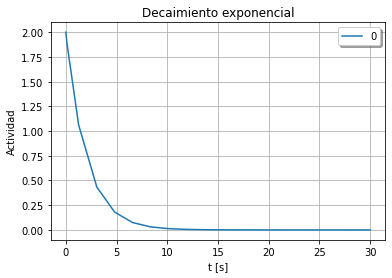

In [24]:
plt.plot(sol.t, sol.y[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0'], shadow = True)
plt.title('Decaimiento exponencial')
plt.grid()
plt.show()

Podemos calcular tres ecuaciones (o mas) a la vez, con distintas actividades iniciales

In [25]:
sol = solve_ivp(exponential_decay, intervalo, [2, 4, 8])

In [26]:
print(sol.y)

[[2.00000000e+00 1.88836035e+00 1.06327177e+00 4.33193118e-01
  1.80172534e-01 7.48304534e-02 3.10715779e-02 1.28917348e-02
  5.33904549e-03 2.20167438e-03 8.99146274e-04 3.59729261e-04
  1.38307144e-04 4.95564437e-05 1.57924962e-05 4.19606550e-06
  8.68633574e-07 6.56828278e-07]
 [4.00000000e+00 3.77672070e+00 2.12654355e+00 8.66386236e-01
  3.60345068e-01 1.49660907e-01 6.21431557e-02 2.57834695e-02
  1.06780910e-02 4.40334876e-03 1.79829255e-03 7.19458522e-04
  2.76614289e-04 9.91128874e-05 3.15849924e-05 8.39213101e-06
  1.73726715e-06 1.31365656e-06]
 [8.00000000e+00 7.55344140e+00 4.25308709e+00 1.73277247e+00
  7.20690135e-01 2.99321814e-01 1.24286311e-01 5.15669390e-02
  2.13561820e-02 8.80669753e-03 3.59658510e-03 1.43891704e-03
  5.53228577e-04 1.98225775e-04 6.31699849e-05 1.67842620e-05
  3.47453430e-06 2.62731311e-06]]


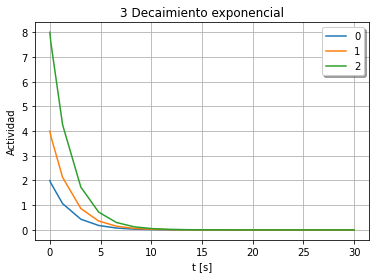

In [27]:
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['0', '1', '2'], shadow = True)
plt.title('3 Decaimiento exponencial')
plt.grid()
plt.show()

Especificando puntos densos.

In [28]:
sol = solve_ivp(exponential_decay, intervalo, [2], dense_output = True)

In [29]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)

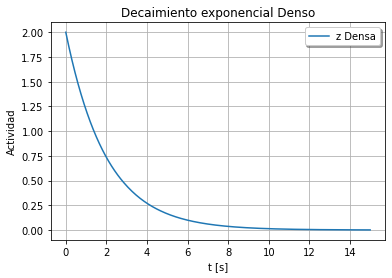

In [30]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Actividad')
plt.legend(['z Densa'], shadow = True)
plt.title('Decaimiento exponencial Denso')
plt.grid()
plt.show()

Especificando puntos donde se desea la solucion.

In [31]:
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8], t_eval = [0, 1, 2, 4, 10])
print(sol.t)
print(sol.y)

[ 0  1  2  4 10]
[[2.         1.21305369 0.73534021 0.27069123 0.01350781]
 [4.         2.42610739 1.47068043 0.54138247 0.02701561]
 [8.         4.85221478 2.94136085 1.08276494 0.05403123]]


## Disparo de cañon

El cañon dispara hacia arriba con un evento final al impactar.
Definimos y[0] es la posicion inicial e y[1] es la velocidad inicial.
El proyectil comienza en la posicion 0 con velocidad +200.

In [32]:
g = 9.8
def disparo(t, y):
    return [y[1], -0.5*g]

sol = solve_ivp(disparo, [0, 100], [0, 200], dense_output = True)

In [33]:
t = np.linspace(0, 90, 300)
z = sol.sol(t)

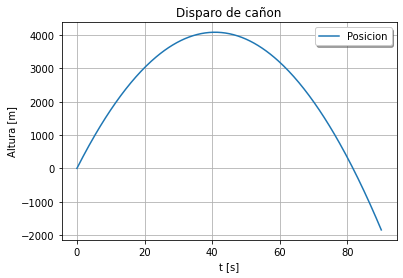

In [34]:
plt.plot(t, z[0])
plt.xlabel('t [s]')
plt.ylabel('Altura [m]')
plt.legend(['Posicion'], shadow = True)
plt.title('Disparo de cañon')
plt.grid()
plt.show()

## Ecuaciones de Lotka-Volterra

Las ecuaciones de Lotka-Volterra, tambien conocidas como ecuaciones predador-presa o presa-predador, son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinamicas de sistemas biologicos en el que dos especies interactuan, una como presa y otra como depredador.
Las ecuaciones fueron propuestos de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926. Tales ecuaciones se definen como:

$${\displaystyle {\frac {dx}{dt}}=x(\alpha -\beta y)}$$

$${\displaystyle {\frac {dy}{dt}}=-y(\gamma -\delta x)}$$

donde:
* *y* es el numero de algun predador (por ejemplo, un zorro)
* *x* es el numero de sus presas (por ejemplo, conejos)
* *dy/dt* y *dx/dt* representa el crecimiento de las dos poblaciones en el tiempo
* *t* representa el tiempo
* *α, β, γ y δ* son parametros (positivos) que representan las interacciones de las dos especies.

En las ecuaciones, por razones de simpleza, las llamaremos *a, b, c, d*, respectivamente.

In [35]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    ec1 = x * (a - b * y)  # a*x - b*x*y
    ec2 = -y * (c - d * x) # -c*y + d*x*y
    return [ec1, ec2]

In [36]:
# pass in the parameter values a=1.5, b=1, c=3 and d=1 with the args argument.
a, b, c, d = 1.5, 1.0, 3.0, 1.0
conejos = 10
zorros = 5
tini = 0
tfin = 20
sol = solve_ivp(lotkavolterra, [tini, tfin], [conejos, zorros], args=(a, b, c, d), dense_output=True)

In [37]:
t = np.linspace(tini, tfin, 300)
z = sol.sol(t)

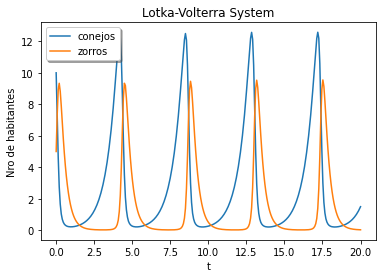

In [38]:
plt.plot(t, z.T)
plt.xlabel('t')
plt.ylabel('Nro de habitantes')
plt.legend(['conejos', 'zorros'], shadow = True)
plt.title('Lotka-Volterra System')
plt.show()

## Ecuacion de Bateman

El decaimiento radiactivo se rige por el siguiente sistema de ecuaciones diferenciales, para el caso de dos isotopos ligados genealogicamente como progenitor/hija

Isótopo madre $$dN_a(t)/dt = - \lambda_a N_a(t)$$

Isótopo hija $$dN_b(t)/dt =  \lambda_a N_a(t) -  \lambda_b N_b(t)$$

In [39]:
# ln(2) = 0.69314718056
def bateman(t, z, a, b):
    x, y = z
    ec1 = -x * a
    ec2 = -y *b + x * a
    return [ec1, ec2]

In [40]:
Ta = 500 # Periodo medio del isotopo madre en segundos
Tb = 300 # Periodo medio del isotopo hija en segundos

# ln(2) = 0.69314718056
a = 0.69314718056 / Ta # Calculo de la constante de decaimiento radiactivo
b = 0.69314718056 / Tb # Calculo de la constante de decaimiento radiactivo

Aa = 200 # Actividad inicial del isotopo madre
Ab = 0 # Actividad inicial del isotopo hija
tini = 0
tfin = 7 * Ta
bat = solve_ivp(bateman, [tini, tfin], [Aa, Ab], args=(a, b), dense_output = True)

In [41]:
t = np.linspace(tini, tfin, 300)
z = bat.sol(t)

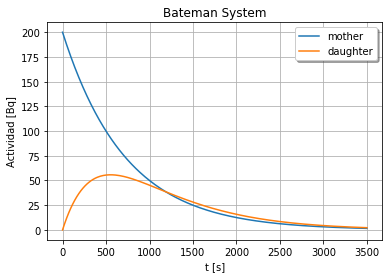

In [42]:
plt.plot(t, z.T)
plt.xlabel('t [s]')
plt.ylabel('Actividad [Bq]')
plt.legend(['mother', 'daughter'], shadow=True)
plt.title('Bateman System')
plt.grid()
plt.show()